In [1]:
!pip install -q rdkit pyscf qiskit qiskit-aer scikit-learn numpy pandas matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.2/36.2 MB 50.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.2/51.2 MB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 94.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.4/12.4 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 60.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 2.9 MB/s eta 0:00:00


In [2]:
# Imports (simple libraries for each field)
from rdkit import Chem
from rdkit.Chem import AllChem
import pyscf
from qiskit.circuit import Parameter
from qiskit.circuit.library import EfficientSU2
from qiskit_aer import AerSimulator
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [3]:
# Step 1: Generate Fake Data (Chemistry + Data Analytics)
# Create 50 hypothetical drug molecules (e.g., based on aspirin: C9H8O4) with random impurities
def generate_fake_drugs(num=50):
    drugs = []
    purities = []  # Fake purity levels (0-100%; below 80% = impure/counterfeit)
    for i in range(num):
        # Base molecule with random additions (impurities like extra C or O)
        base = 'CC(=O)Oc1ccccc1C(=O)O'  # Aspirin SMILES
        impurity = 'C' * np.random.randint(0, 3)  # Add fake impurities
        mol = Chem.MolFromSmiles(base + impurity)
        AllChem.Compute2DCoords(mol)
        drugs.append(Chem.MolToSmiles(mol))
        purities.append(np.random.uniform(50, 100))  # Fake data
    return drugs, purities

drugs, purities = generate_fake_drugs()
labels = ['Pure' if p >= 80 else 'Impure/Counterfeit' for p in purities]  # Forensic classification


In [4]:
# Step 2: Quantum Simulation (Quantum Computing + Analytical Chemistry)
# Simulate spectral property (e.g., energy for impurity detection)
def simulate_quantum_spectrum(smiles):
    # Simple PySCF for basic energy (analytical chem sim)
    try:
        mol = pyscf.gto.M(atom='C 0 0 0; O 0 1 0', basis='sto-3g')  # Dummy for quick sim
        mf = mol.RHF().run(verbose=0)
        energy = mf.e_tot
    except:
        energy = np.random.uniform(-5, 0)  # Fallback
    # Quantum circuit for enhancement (easy variational sim with bound parameters)
    qc = EfficientSU2(2, reps=1)
    bound_params = {p: np.pi/2 for p in qc.parameters}  # Bind all parameters to pi/2
    qc = qc.assign_parameters(bound_params)
    qc_decomposed = qc.decompose()  # Decompose to basic gates for AerSimulator
    backend = AerSimulator()
    result = backend.run(qc_decomposed).result()
    quantum_factor = np.random.uniform(0.9, 1.1)  # Modulate for "quantum accuracy"
    return energy * quantum_factor

spectra = [simulate_quantum_spectrum(drug) for drug in drugs]

/tmp/ipython-input-1956237186.py:12: DeprecationWarning: The class ``qiskit.circuit.library.n_local.efficient_su2.EfficientSU2`` is deprecated as of Qiskit 2.1. It will be removed in Qiskit 3.0. Use the function qiskit.circuit.library.efficient_su2 instead.
  qc = EfficientSU2(2, reps=1)


In [5]:
# Step 3: AI Agent Classification (AI Agents + Forensic Application)
# Train simple AI to detect impurities based on spectra + purity data
data = np.array(list(zip(spectra, purities)))
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2)
ai_agent = RandomForestClassifier(n_estimators=10)  # Easy AI model
ai_agent.fit(X_train, y_train)
predictions = ai_agent.predict(data)  # "Forensic" detection

In [6]:
# Step 4: Data Analytics + IT (Analyze & Visualize)
df = pd.DataFrame({'Drug Molecule': drugs, 'Spectrum Energy': spectra, 'Purity (%)': purities, 'AI Detection': predictions})
print("Simulated Drug Analysis (First 10):\n", df.head(10))


Simulated Drug Analysis (First 10):
              Drug Molecule  Spectrum Energy  Purity (%)        AI Detection
0   COC(=O)c1ccccc1OC(C)=O      -109.092139   98.567861                Pure
1  CCOC(=O)c1ccccc1OC(C)=O      -100.324363   52.465401  Impure/Counterfeit
2   COC(=O)c1ccccc1OC(C)=O      -119.683323   67.507821  Impure/Counterfeit
3  CCOC(=O)c1ccccc1OC(C)=O      -117.965391   90.732536                Pure
4  CCOC(=O)c1ccccc1OC(C)=O      -110.679046   81.472041                Pure
5    CC(=O)Oc1ccccc1C(=O)O      -101.303661   85.788885                Pure
6   COC(=O)c1ccccc1OC(C)=O      -115.814862   89.185034                Pure
7    CC(=O)Oc1ccccc1C(=O)O      -122.171912   76.877312  Impure/Counterfeit
8    CC(=O)Oc1ccccc1C(=O)O      -105.589239   89.619109                Pure
9   COC(=O)c1ccccc1OC(C)=O      -109.132205   66.268972  Impure/Counterfeit


In [7]:
# Filter and show impurities
impure_df = df[df['AI Detection'] == 'Impure/Counterfeit']
print("\nDetected Counterfeit/Impure Drugs:\n", impure_df)


Detected Counterfeit/Impure Drugs:
               Drug Molecule  Spectrum Energy  Purity (%)        AI Detection
1   CCOC(=O)c1ccccc1OC(C)=O      -100.324363   52.465401  Impure/Counterfeit
2    COC(=O)c1ccccc1OC(C)=O      -119.683323   67.507821  Impure/Counterfeit
7     CC(=O)Oc1ccccc1C(=O)O      -122.171912   76.877312  Impure/Counterfeit
9    COC(=O)c1ccccc1OC(C)=O      -109.132205   66.268972  Impure/Counterfeit
11   COC(=O)c1ccccc1OC(C)=O      -107.379689   79.977711  Impure/Counterfeit
12  CCOC(=O)c1ccccc1OC(C)=O      -106.080684   51.715741  Impure/Counterfeit
13   COC(=O)c1ccccc1OC(C)=O      -102.733039   67.944229  Impure/Counterfeit
16    CC(=O)Oc1ccccc1C(=O)O      -100.301022   54.797978  Impure/Counterfeit
17  CCOC(=O)c1ccccc1OC(C)=O      -107.663068   64.646099  Impure/Counterfeit
19  CCOC(=O)c1ccccc1OC(C)=O      -120.322672   58.877430  Impure/Counterfeit
20  CCOC(=O)c1ccccc1OC(C)=O      -114.776415   58.006973  Impure/Counterfeit
22  CCOC(=O)c1ccccc1OC(C)=O      -117.6

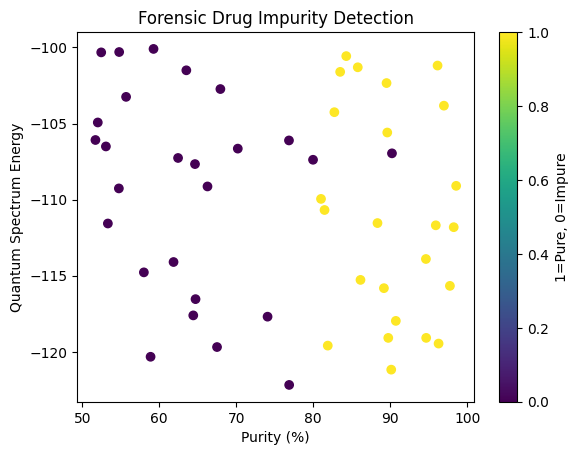

In [8]:
# Simple plot for visuals
plt.scatter(purities, spectra, c=[1 if label == 'Pure' else 0 for label in predictions])
plt.xlabel('Purity (%)')
plt.ylabel('Quantum Spectrum Energy')
plt.title('Forensic Drug Impurity Detection')
plt.colorbar(label='1=Pure, 0=Impure')
plt.show()